# Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import numpy as np

In [3]:
DATA_PATH = "./data"

csv_df = pd.read_csv(os.path.join(DATA_PATH, "driving_log.csv"), index_col=False)
csv_df.columns = ['center', 'left', 'right', 'steer', 'throttle', 'brake', 'speed']
csv_df = csv_df.sample(n=len(csv_df))

In [4]:
## Training and Validation Data
training_count = int(0.8 * len(csv_df))
training_data = csv_df[:training_count].reset_index()
validation_data = csv_df[training_count:].reset_index()

# Steering Angle Distribution

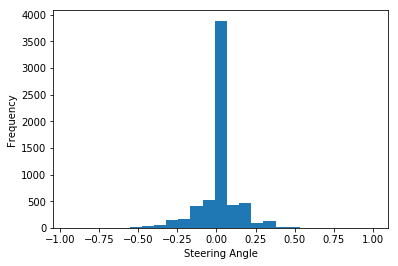

In [5]:
## Plotting Steering Angle
training_data.steer.plot.hist(bins=25)
plt.xlabel('Steering Angle')

# Image Cropping 

([], <a list of 0 Text xticklabel objects>)

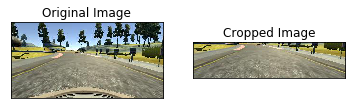

In [6]:
IMAGE_PATH = DATA_PATH + '/IMG'
plt.subplot(1,2,1)
image_filename = training_data['center'].iloc[262].split('/')[-1]
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Original Image')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
image_filename = training_data['center'].iloc[262].split('/')[-1]
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img[60:135, : ])
plt.title('Cropped Image')
plt.yticks([])
plt.xticks([])

# Images Flipping 

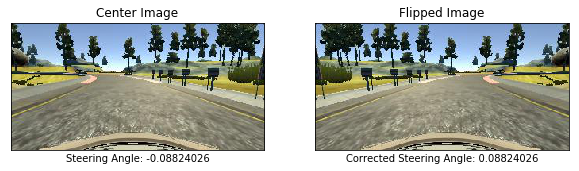

In [7]:
fig = plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Center Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Steering Angle: ' + str(training_data['steer'].iloc[262]))

plt.subplot(1,2,2)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(np.fliplr(img))
plt.title('Flipped Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Corrected Steering Angle: ' + str(-training_data['steer'].iloc[262]))

# Angle Correction for Left and Right Images

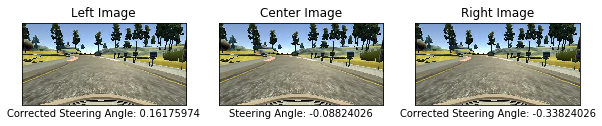

In [8]:
fig = plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Left Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Corrected Steering Angle: ' + str(training_data['steer'].iloc[262] + 0.25))

plt.subplot(1,3,2)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Center Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Steering Angle: ' + str(training_data['steer'].iloc[262]))


plt.subplot(1,3,3)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Right Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Corrected Steering Angle: ' + str(training_data['steer'].iloc[262] - 0.25))

# Translating Images

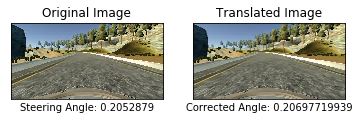

In [8]:
import cv2

def trans_image(image, steer):
    """ Returns translated image and 
    corrsponding steering angle.
    """
    trans_range = 100
    tr_x = trans_range * np.random.uniform() - trans_range / 2
    steer_ang = steer + tr_x / trans_range * 2 * .2
    tr_y = 0
    M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    image_tr = cv2.warpAffine(image, M, (320,160))
    return image_tr, steer_ang

steer_ang = training_data['steer'].iloc[169]
new_img, new_steer_ang = trans_image(img, steer_ang)

plt.subplot(1,2,1)
img = plt.imread(os.path.join(IMAGE_PATH, image_filename.strip()))
plt.imshow(img)
plt.title('Original Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Steering Angle: ' + str(steer_ang))

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.title('Translated Image')
plt.yticks([])
plt.xticks([])
plt.xlabel('Corrected Angle: ' + str(new_steer_ang))